## Task List

In [ ]:
#pip install geopy 
#pip install Nominatim

-Top 10 Happiest Countries (max on happiness) 

Life Ladder = 10 being best, 0 worst


CHARTS/GRAPHS/PLOTS
Avg Region Rank of Happinness
-region - happinness score



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pprint import pprint

import gmaps
import os

#Import API key
from api_keys import g_key

#Access maps with unique API key
gmaps.configure(api_key=g_key)


In [2]:
# Pull CSV Files
happiness_path = "Resources/DataPanelWHR2021C2.csv"
mortality_path = "Resources/MortalityDataWHR2021C2.csv"
regions_path = "Resources/All Countries/all.csv"

# Read CSV - Create Dataframes
happy_df = pd.read_csv(happiness_path, parse_dates=['year'])

In [3]:
death_df = pd.read_csv(mortality_path)
death_df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [4]:
regions_df = pd.read_csv(regions_path)
regions_df = regions_df.rename(columns={'name': 'Country name'}) 

In [5]:
# Combine the data into a single dataset
happy_region_df =  pd.merge(happy_df, regions_df,
                                 how='left', on='Country name')

In [6]:
happy_region_df.keys()

#clean_happy_region_df = {[

# #(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
#        'Social support', 'Healthy life expectancy at birth',
#        'Freedom to make life choices', 'Generosity',
#        'Perceptions of corruption', 'Positive affect', 'Negative affect',
#        'alpha-2', 'alpha-3', 'country-code', 'region',
#        'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
#        'intermediate-region-code'],
#       dtype='object')


list_2020_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2020-01-01"])

list_2020_data_df =  pd.merge(list_2020_countries, happy_region_df,
                                 how='left', on='Country name')

list_2011_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2011-01-01"])

list_2011_data =  pd.merge(list_2011_countries, list_2020_data_df,
                                 how='left', on='Country name')

list_2013_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2013-01-01"])
list_2013_countries
list_2013_data =  pd.merge(list_2013_countries, list_2011_data,
                                 how='left', on='Country name')
list_2019_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2019-01-01"])
list_2019_countries
list_2019_data =  pd.merge(list_2019_countries, list_2013_data,
                                 how='left', on='Country name')
list_2014_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2014-01-01"])
list_2014_countries
list_2014_data =  pd.merge(list_2014_countries, list_2019_data,
                                 how='left', on='Country name')

list_2018_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2018-01-01"])
list_2018_countries
final_data_df =  pd.merge(list_2018_countries, list_2014_data,
                                 how='left', on='Country name')
# # list_2011_count
final_data_df = final_data_df.loc[final_data_df["year"] > '2010-01-01']

#Update Taiwan
final_data_df['Country name'] = final_data_df['Country name'].replace({'Taiwan Province of China': 'Taiwan'})


final_data_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
4,Albania,2011-01-01,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
5,Albania,2012-01-01,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
6,Albania,2013-01-01,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
7,Albania,2014-01-01,4.814,9.378,0.626,67.52,0.735,-0.025,0.883,0.685,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
8,Albania,2015-01-01,4.607,9.403,0.639,67.80,0.704,-0.081,0.885,0.688,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN


In [7]:
coordinates_df = pd.DataFrame(columns = ['Country', 'Lat', 'Lng'])
coordinates_df['Country'] = final_data_df["Country name"].unique()

coordinates_df.head(67)

,Country,Lat,Lng
0,Albania,NaN,NaN
1,Argentina,NaN,NaN
2,Australia,NaN,NaN
3,Austria,NaN,NaN
4,Bangladesh,NaN,NaN
...,...,...,...
62,South Korea,NaN,NaN
63,Spain,NaN,NaN
64,Sweden,NaN,NaN
65,Taiwan,NaN,NaN


## Heat Maps

In [8]:
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm

#lat=[]
#lng=[]

# #Add Lat and Lng columns
# final_data_df["Latitude"] = ""
# final_data_df["Longitude"] = ""

# address='Taiwan'
# geolocator = Nominatim(user_agent="Your_Name")
# location = geolocator.geocode(address)
# print(location.address)
# print((location.latitude, location.longitude))

In [9]:
coordinates_hash = {}

In [10]:
for index,country in tqdm(list(final_data_df["Country name"].items())):
    if country in coordinates_hash:
        location = coordinates_hash[country]
        
    else:  
        #address = x
        geolocator = Nominatim(user_agent="Your_Name")
        location = geolocator.geocode(country)
        coordinates_hash[country]=location
        
    final_data_df.loc[index,'Lat']=location.latitude
    final_data_df.loc[index,'Lng']=location.longitude        
    #coordinates_df.loc[index,'Lat']=location.latitude
    #coordinates_df.loc[index,'Lng']=location.longitude
    
    #     #lng.append(location.longitude)
#     #time.sleep(1)
#     print(index,x)
#     print(country)
#     print(location.latitude)
#     print(location.longitude)
#     print(coordinates_df.loc[country,'Lng'])
    
    
#     if x not in coordinates_df["Country"]:
#         lat.append(location.latitude)
#         lng.append(location.longitude)

100%|███████████████████████████████████████████| 800/800 [00:37<00:00, 21.43it/s]


In [11]:
#coordinates_df.head()
final_data_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Lat,Lng
4,Albania,2011-01-01,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,...,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,41.000028,19.999962
5,Albania,2012-01-01,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,...,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,41.000028,19.999962
6,Albania,2013-01-01,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,...,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,41.000028,19.999962
7,Albania,2014-01-01,4.814,9.378,0.626,67.52,0.735,-0.025,0.883,0.685,...,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,41.000028,19.999962
8,Albania,2015-01-01,4.607,9.403,0.639,67.80,0.704,-0.081,0.885,0.688,...,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,41.000028,19.999962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Zimbabwe,2016-01-01,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,...,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,-18.455496,29.746841
1201,Zimbabwe,2017-01-01,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,...,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,-18.455496,29.746841
1202,Zimbabwe,2018-01-01,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,...,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,-18.455496,29.746841
1203,Zimbabwe,2019-01-01,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,...,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,-18.455496,29.746841


In [15]:
final_data_df_2020 =final_data_df.sort_values('Life Ladder', ascending = False).loc[final_data_df['year']>='2020']
final_data_df_2019 =final_data_df.sort_values('Life Ladder', ascending = False).loc[final_data_df['year']>='2019']

In [ ]:
# Plot Heatmap
#fig = gmaps.figure()
fig = gmaps.figure(center =[25,0],zoom_level=1.9)

location_df = final_data_df_2020[["Lat","Lng"]]
heat_layer = gmaps.heatmap_layer(location_df, 
                                weights=final_data_df["Life Ladder"], 
                                dissipating = False,
                                max_intensity = 100,
                                point_radius = 5,
                                )



In [ ]:
# Add the layer to the map
fig.add_layer(heat_layer)
fig

In [ ]:
final_data_df_2019 = final_data_df.sort_values('Life Ladder', ascending = False).loc[final_data_df['year']=='2019-01-01']

# Plot Heatmap
#fig = gmaps.figure()
fig = gmaps.figure(center =[25,0],zoom_level=1.9)

location_df = final_data_df_2019[["Lat","Lng"]]
heat_layer = gmaps.heatmap_layer(location_df, 
                                weights=final_data_df["Life Ladder"], 
                                dissipating = False,
                                max_intensity = 100,
                                point_radius = 5,
                                )

# Add the layer to the map
fig.add_layer(heat_layer)
fig

## Bar and Pie Charts

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


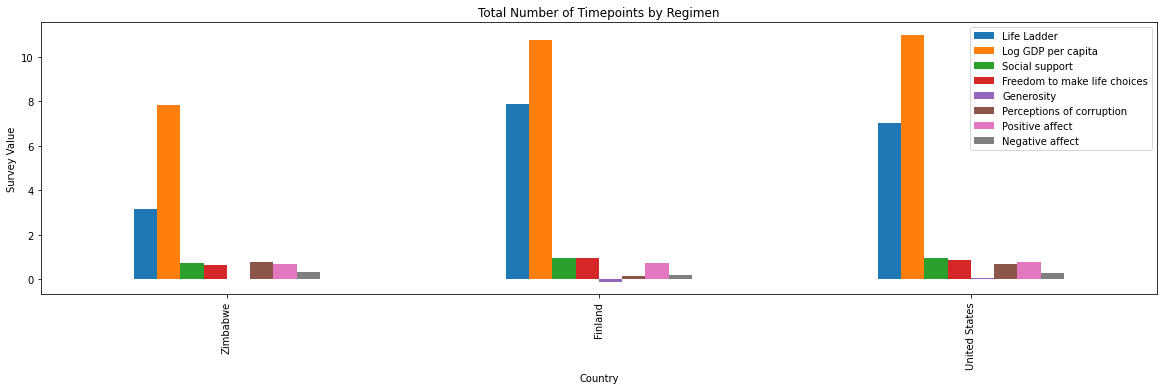

In [111]:
maxvalue = final_data_df_2020['Life Ladder'].max()
minvalue = final_data_df_2020['Life Ladder'].min()
max2020 = final_data_df_2020.loc[final_data_df_2020['Life Ladder'] == maxvalue]
min2020 = final_data_df_2020.loc[final_data_df_2020['Life Ladder'] == minvalue]
us2020 = final_data_df_2020.loc[final_data_df_2020['Country name'] == 'United States']
df = pd.DataFrame()
df = df.append(min2020)
df = df.append(max2020)
df = df.append(us2020)
df = df.drop(columns=['year',
       'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code', 'Lat', 'Lng','Healthy life expectancy at birth'])
# df.reset_index(drop=True, inplace=True)
df.set_index("Country name", inplace = True)
df
pd_plt_sum =  df.plot(kind="bar", figsize=(20,5))
pd_plt_sum.set_title('Total Number of Timepoints by Regimen')
# plt.xticks(ticks = None, labels = df['Country name'])
pd_plt_sum.set_xlabel('Country')
pd_plt_sum.set_ylabel('Survey Value')

print(df. columns)

In [ ]:

gender_label = ["Female", "Male"]

colors = ["yellowgreen", "skyblue"]

plt.pie(gender_num, colors = colors,labels = gender_label,
        autopct = "%1.1f%%", shadow = True, startangle = 140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Distribution of Female vs Male Mice")
plt.legend(title="Sex", loc="lower right")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Pandas can also plot multiple columns if the DataFrame includes them

mouse_regimen_data= pd.DataFrame({
                                "Time Point": round(grouped_drug_regimen_df["Timepoint"].count(),2), 
                                }).sort_values(by="Time Point", ascending = False)
mouse_regimen_data.head()
pd_plt_sum =  mouse_regimen_data.plot(kind="bar", figsize=(20,5))
pd_plt_sum.set_title('Total Number of Timepoints by Regimen')
pd_plt_sum.set_xlabel('Drug Regimen')
pd_plt_sum.set_ylabel('Total Timepoint')

plt.show()
plt.tight_layout()

In [ ]:
# DATA SET 1
# drug_regimen = mouse_regimen_data["Drug Regimen"]
mouse_regimen_plt = mouse_regimen_data.reset_index()
timepoint = mouse_regimen_plt["Time Point"]
drug_regimen = mouse_regimen_plt["Drug Regimen"]

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(drug_regimen))

tick_location = [value for value in x_axis]
# second way to do this
# tick_location = []
# for x in x_axis:
#     tick_locations.append(x)
    
plt.xticks(tick_location, drug_regimen)
plt.xticks(rotation=90)
plt.bar(drug_regimen, timepoint, color ='orange', alpha = 0.5, align="center",width =.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoint')
plt.title('Total Number of Timepoints by Regimen')
plt.show()
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = combined_data['Sex'].value_counts()
mouse_sex
pie_sex =  mouse_sex.plot(kind="pie", autopct='%1.1f%%', figsize=(20,5), title = "Sex Share")
plt.show()
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf = ['Male','Female']
colors = ["lightblue", "orange"]

plt.pie(mouse_sex, labels = mf, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 0)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("Sex Share" )
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Table with needed columns to pick out max time point

ft_df= combined_data.filter(['Mouse ID','Timepoint', 'Drug Regimen'], axis=1)
ft_df.head(10)

#Takes timepoint.max() and groups by Mouse ID

max_time = ft_df.groupby(['Mouse ID']).max()
max_time

In [ ]:
#merging the mouse id with time point with volume
# Start by getting the last (greatest) timepoint for each mouse
combined_data_max_time =  pd.merge(max_time, study_results,
                                 how='left', on=['Mouse ID','Timepoint'])
combined_data_max_time

# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge on mouseid and Timeframe
array = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
combined_regimen = combined_data_max_time.loc[combined_data_max_time['Drug Regimen'].isin(array)]
combined_regimen









In [ ]:



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = combined_regimen['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('\033[1m' + "Quartiles and Outliers Overview" + '\033[0m')
print("")
print(f"Quartiles")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
print(" ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Outliers")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

 #['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
array = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
capo = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Capomulin']
capo
ram = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Ramicane']
ram
infu = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Infubinol']
infu
ceft = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Ceftamin']
ceft
data = [capo['Tumor Volume (mm3)'], ram['Tumor Volume (mm3)'], infu['Tumor Volume (mm3)'], ceft['Tumor Volume (mm3)']]


red_circle = dict(markerfacecolor = 'r')

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Mice accross four Regimens')
ax1.set_ylabel('Tumor Volumes')
ax1.set_xticklabels(array)
ax1.boxplot(data, flierprops = red_circle)
plt.show()


Observation Box Plot: between the 4 drugs it seems that Capomulin and Ramicane are the best results of the sample size as the final tumor sizs had the lowest mean.  Infubinol did have an outlier that needs to be investigated.

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# capomulin_data = grouped_drug_regimen_df.describe()

# capomulin_data

capomulin_data = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
capomulin_data = combined_data.loc[combined_data["Mouse ID"]=="s185"]
capomulin_data

capomulin is effective as the tumor size decrease over time

In [ ]:
#capomulin_line = plt.plot(capomulin_data['Tumor Volume (mm3)'],capomulin_data['Timepoint'], color="blue" )
capomulin_line = plt.plot(capomulin_data['Timepoint'],capomulin_data['Tumor Volume (mm3)'], color="blue" )
plt.title("Mouse s185: Tumor Vol vs Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()
# Show the chart


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data_avg = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
groupby_capomulin_mouse = capomulin_data_avg.groupby(["Mouse ID"]).mean()
groupby_capomulin_mouse.reset_index()


In [ ]:
plt.scatter(groupby_capomulin_mouse['Weight (g)'],groupby_capomulin_mouse['Tumor Volume (mm3)'], c = groupby_capomulin_mouse['Age_months'])
clb = plt.colorbar()
clb.set_label("Age")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume")
plt.title("Capomulin Mouse Weight vs Tumor Volume Overview")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(groupby_capomulin_mouse['Weight (g)'],groupby_capomulin_mouse['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
x_values = groupby_capomulin_mouse['Weight (g)']
y_values = groupby_capomulin_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title("Capomulin Average Tumor Volume and Weight Regression")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()




Capomulin show a strong positive coorelation between weight and tumor size.  we can infer that with higher weight you may have a higher tumor size.  we also have a tight R-squared which will state not a large variation to the mean.